In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("rough.csv")
df

,Unnamed: 0,Annual Rental Value,Extent of Site (Sq.Yds),Lift,Toilets,Water Tap,Electricity,Attached Bathroom,Water Harvesting,cable connection,...,Revenue Ward 67.1,Revenue Ward 68.1,Revenue Ward 69.1,Revenue Ward 7.1,Revenue Ward 70.1,Revenue Ward 71.1,Revenue Ward 72.1,Revenue Ward 73.1,Revenue Ward 8.1,Revenue Ward 9.1
0,0,0,0.0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,4515,4533,21021.0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4516,4516,4855,21021.0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4517,4517,5090,21021.0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4518,4518,9183,113627.0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# removing 
df1=df.loc[df["Annual Rental Value"]!=0]
df1=df1.loc[df1["Extent of Site (Sq.Yds)"]!=0]
df1=df1.drop(["Unnamed: 0"],axis="columns")
df1
df1.to_csv("latest.csv")

In [4]:
X=df1.drop(["Annual Rental Value"],axis="columns")
X

,Extent of Site (Sq.Yds),Lift,Toilets,Water Tap,Electricity,Attached Bathroom,Water Harvesting,cable connection,Central Government 50%,Private,...,Revenue Ward 67.1,Revenue Ward 68.1,Revenue Ward 69.1,Revenue Ward 7.1,Revenue Ward 70.1,Revenue Ward 71.1,Revenue Ward 72.1,Revenue Ward 73.1,Revenue Ward 8.1,Revenue Ward 9.1
2201,9.36,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2202,10.00,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2203,11.60,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2204,12.16,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2205,12.16,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,21021.00,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4516,21021.00,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4517,21021.00,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4518,113627.00,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y=df1["Annual Rental Value"].copy()
y

2201     1047
2202     4435
2203     1120
2204     3948
2205     5040
        ...  
4515     4533
4516     4855
4517     5090
4518     9183
4519    12027
Name: Annual Rental Value, Length: 2310, dtype: int64

In [6]:
y=y.values

In [7]:
y=y.reshape((len(y),1))
y.shape

(2310, 1)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [9]:
X_train.shape

(1848, 242)

In [10]:
y_train.shape

(1848, 1)

In [11]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

-0.5871918959265534

In [12]:
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train,y_train)

C:\Users\anura\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1095: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [13]:
rbf_model.score(X_test,y_test)

0.025974025974025976

In [14]:
# You are passing floats to a classifier which expects categorical values as the target vector. If you convert it to int it will be accepted as input (although it will be questionable if that's the right way to do it).

# It would be better to convert your training scores by using scikit's labelEncoder function.

# The same is true for your DecisionTree and KNeighbors qualifier.

from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

C:\Users\anura\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# encoded=encoded.reshape((len(encoded),1))
encoded

array([1393,  122, 1395, ...,  561,   37,   37], dtype=int64)

In [44]:
lis=[]
for i in range(50):
    lis.append(i*1000)
lis
    

[0,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 29000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000,
 41000,
 42000,
 43000,
 44000,
 45000,
 46000,
 47000,
 48000,
 49000]

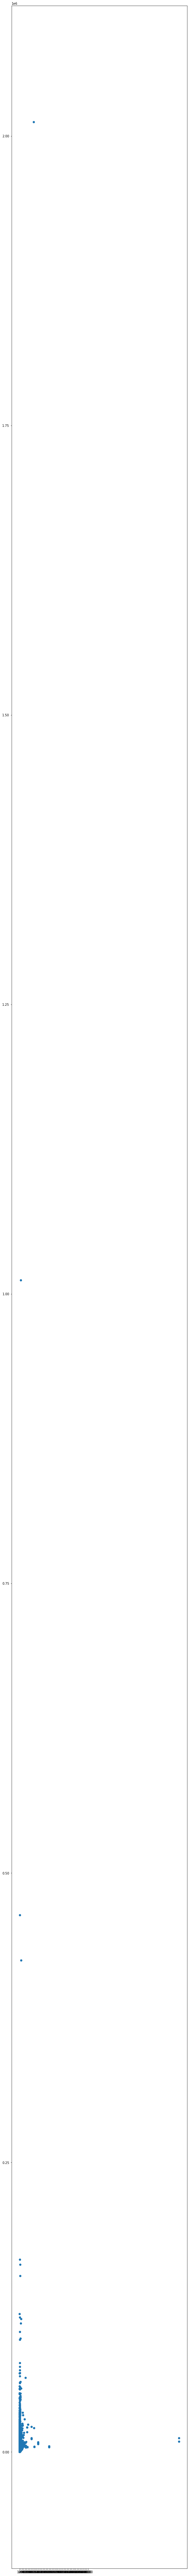

In [60]:
# matplotlib.rcParams['figure.figsize'] = (15,10)
# plt.scatter(df1["Annual Rental Value"],df1["Extent of Site (Sq.Yds)"],color="red",marker="+")
# plt.xticks(range(len(lis)), lis)
plt.scatter(df1["Extent of Site (Sq.Yds)"].values,df1["Annual Rental Value"].values)
plt.rcParams["figure.figsize"] = [10,15]
ax1 = plt.subplot()
ax1.set_xticks(lis)
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

C:\Users\anura\AppData\Local\Temp/ipykernel_6408/3950815144.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier()

In [21]:
model.score(X_test,y_test)

0.09740259740259741

In [22]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [23]:
model.fit(X_train,y_train)

C:\Users\anura\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1095: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [24]:
model.score(X_test,y_test)

0.07575757575757576

In [26]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

C:\Users\anura\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1095: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [27]:
model.score(X_test,y_test)

0.02813852813852814